# Problem 2 - KNN hyperparameter tuning using cross validation

## 2.1

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
data = pd.read_csv('Social_Network_Ads.csv')
data #displaying the data will help me understand the content and structure of the dataset

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [25]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

#Select features and target variable
X = data.iloc[:, [2,3]].values  # Age, Estimated Salary
y = data.iloc[:, -1].values     # Target variable: Purchased --> 0 = no, 1 = yes ??

# Initialize StandardScaler
scaler = StandardScaler()

# Fit the scaler on the data and transform both the training and testing set
X_scaled = scaler.fit_transform(X)

#Train test split on the dataset --> test size = 0.20, training size = 0.80
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.20, random_state=42)

# Initialize the model with K=4 and p=2 (Euclidean Distance)
model = KNeighborsClassifier(n_neighbors=4, p=2)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the misclassification error
misclassification_error = 1 - accuracy_score(y_test, y_pred)

#Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Use cross-validation to get more reliable estimates of model performance
accuracies = cross_val_score(model, X_scaled, y, cv=5)  # 5-fold cross-validation
print(f"Average Accuracy from Cross-Validation: {accuracies.mean():.4f}")

# Calculate and print the evaluation metrics
print("\n----------Evaluation Metrics After Training a KNN Classifier----------")
print(f"- Confusion Matrix:\n", conf_matrix)
print(f"- Misclassification Error: {misclassification_error:.4f}")
print(f"- Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"- Precision: {precision_score(y_test, y_pred):.4f}")
print(f"- Recall: {recall_score(y_test, y_pred):.4f}")
print(f"- F-1 Score: {f1_score(y_test, y_pred):.4f}")


Average Accuracy from Cross-Validation: 0.8825

----------Evaluation Metrics After Training a KNN Classifier----------
- Confusion Matrix:
 [[49  3]
 [ 3 25]]
- Misclassification Error: 0.0750
- Accuracy: 0.9250
- Precision: 0.8929
- Recall: 0.8929
- F-1 Score: 0.8929


## 2.2

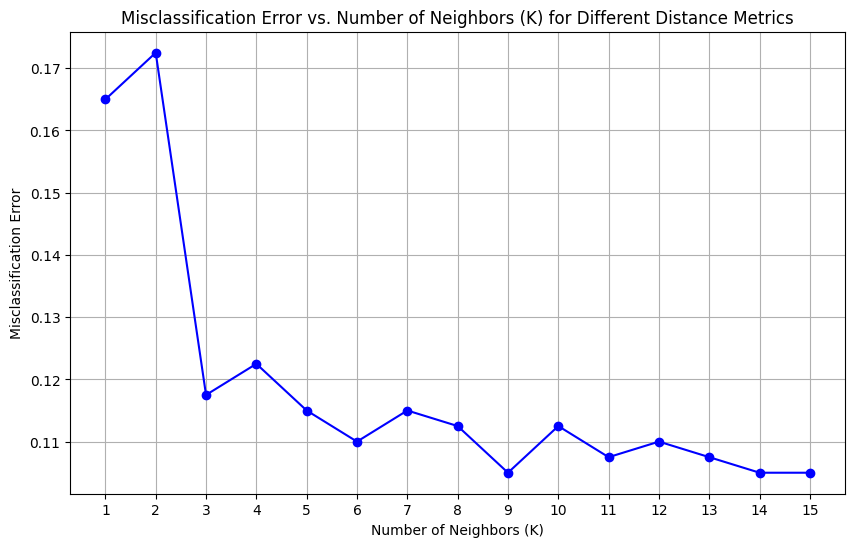

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

# Initialize variables
k_range = range(1, 16)  # [1, 2, ..., 15]
misclassification_errors = []

# For each value of K, perform 5-fold cross-validation and calculate the misclassification error
for k in k_range:
    model = KNeighborsClassifier(n_neighbors=k, p=1)  # Manhattan Distance
    accuracies = cross_val_score(model, X_scaled, y, cv=5)  # 5-fold cross-validation
    misclassification_error = 1 - np.mean(accuracies)
    misclassification_errors.append(misclassification_error)

# Plot misclassification error as a function of K
plt.figure(figsize=(10,6))
plt.plot(k_range, misclassification_errors, marker='o', linestyle='-', color='b', label='p=1 (Manhattan Distance)')
plt.title('Misclassification Error vs. Number of Neighbors (K) for Different Distance Metrics')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Misclassification Error')
plt.xticks(k_range)
plt.grid(True)
plt.show()


## 2.3

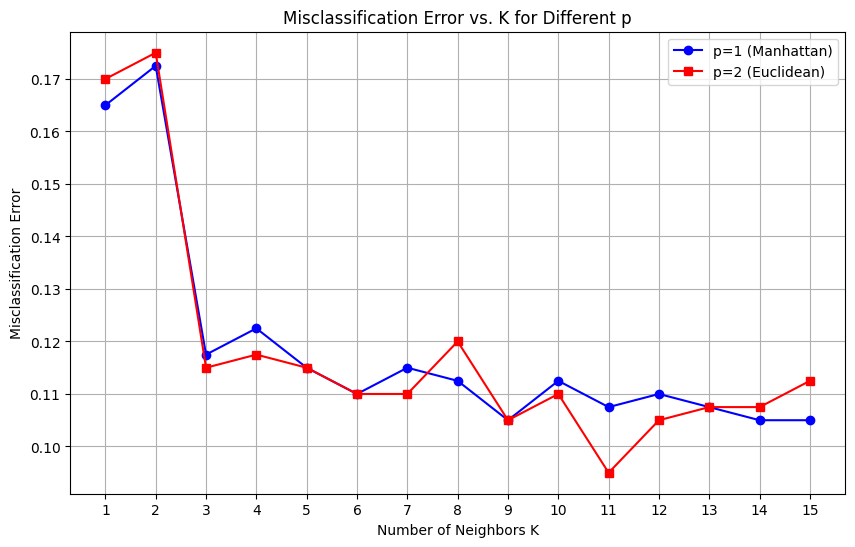

In [27]:
# Initialize variables for p=2
misclassification_errors_p2 = []

# For each value of K, perform 5-fold cross-validation with p=2 and calculate the misclassification error
for k in k_range:
    model = KNeighborsClassifier(n_neighbors=k, p=2)  # Euclidean Distance
    accuracies = cross_val_score(model, X_scaled, y, cv=5)  # 5-fold cross-validation
    misclassification_error = 1 - np.mean(accuracies)
    misclassification_errors_p2.append(misclassification_error)

# Plot misclassification error as a function of K for both p=1 and p=2
plt.figure(figsize=(10,6))
plt.plot(k_range, misclassification_errors, marker='o', linestyle='-', color='b', label='p=1 (Manhattan)')
plt.plot(k_range, misclassification_errors_p2, marker='s', linestyle='-', color='r', label='p=2 (Euclidean)')
plt.title('Misclassification Error vs. K for Different p')
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.xticks(k_range)
plt.legend()
plt.grid(True)
plt.show()

## 2.4

In [28]:
# Find the minimum misclassification error and corresponding K for p=1
min_error_p1 = min(misclassification_errors)
best_k_p1 = k_range[misclassification_errors.index(min_error_p1)]  # This assumes k_range is a Python list.

# Find the minimum misclassification error and corresponding K for p=2
min_error_p2 = min(misclassification_errors_p2)
best_k_p2 = k_range[misclassification_errors_p2.index(min_error_p2)]  # This assumes k_range is a Python list.

# Print the best K for each distance metric and overall best combination of p and K
print(f"Best K for p=1 (Manhattan) is {best_k_p1} with error {min_error_p1:.4f}")
print(f"Best K for p=2 (Euclidean) is {best_k_p2} with error {min_error_p2:.4f}")

if min_error_p1 < min_error_p2:
    print(f"Overall, the best classifier uses p=1 with K={best_k_p1} and has error {min_error_p1:.4f}")
else:
    print(f"Overall, the best classifier uses p=2 with K={best_k_p2} and has error {min_error_p2:.4f}")


Best K for p=1 (Manhattan) is 9 with error 0.1050
Best K for p=2 (Euclidean) is 11 with error 0.0950
Overall, the best classifier uses p=2 with K=11 and has error 0.0950
